In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy
import matplotlib.pyplot as plt

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\HCC_Lu\HCC_Lu_preprocessed_noscale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
adata.shape

(71915, 25712)

In [3]:
adata.obs.head()

,celltype,res_3_clus,sample,site,patient,stage,virus,leiden
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV,Leiden_3
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1


In [4]:
adata.obs['stage'].unique()

['I', 'IIIB', 'IIIA', 'II', 'IV']
Categories (5, object): ['I', 'II', 'IIIA', 'IIIB', 'IV']

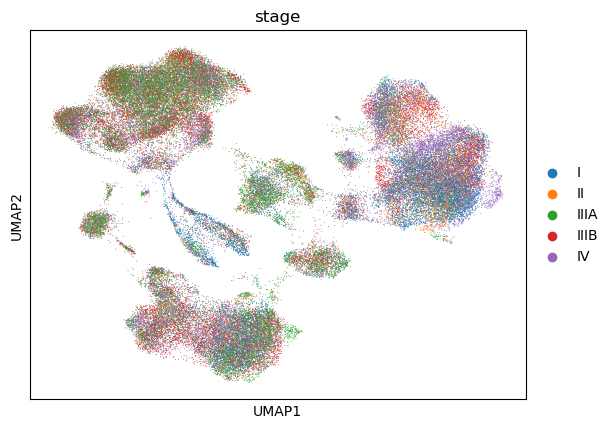

In [5]:
# UMAP by cancer stage
sc.pl.umap(adata, color='stage')

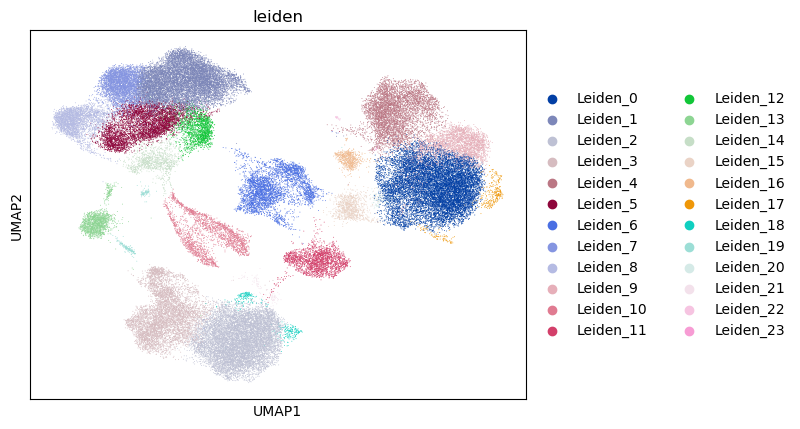

In [6]:
sc.pl.umap(adata, color='leiden')

In [7]:
# count number of cells in leiden clusters
adata.obs['leiden'].value_counts()

leiden
Leiden_0     11758
Leiden_1     10188
Leiden_2      9742
Leiden_3      5660
Leiden_4      5021
Leiden_5      4740
Leiden_6      3858
Leiden_7      3815
Leiden_8      2920
Leiden_9      2881
Leiden_10     2220
Leiden_11     2103
Leiden_12     1641
Leiden_13     1495
Leiden_14     1065
Leiden_15      946
Leiden_16      599
Leiden_17      367
Leiden_18      321
Leiden_19      260
Leiden_20      182
Leiden_21      107
Leiden_22       19
Leiden_23        7
Name: count, dtype: int64

## Composition of Stages

In [ ]:
### List the stage composition for every Leiden cluster
clusters = [f'Leiden_{i}' for i in range(24)]

# Calculating the composition of 'Stage' percentages in each 'Leiden' cluster
percentage = adata.obs.groupby('leiden')['stage'].value_counts(normalize=True)
percentage

C:\Users\evanlee\AppData\Local\Temp\ipykernel_31428\422516814.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage = adata.obs.groupby('leiden')['stage'].value_counts(normalize=True)


leiden     stage
Leiden_0   I        0.386545
           IIIB     0.238051
           IV       0.146368
           II       0.125106
           IIIA     0.103929
                      ...   
Leiden_23  IV       1.000000
           I        0.000000
           II       0.000000
           IIIA     0.000000
           IIIB     0.000000
Name: proportion, Length: 120, dtype: float64

In [21]:
# reshape the hierarchical data into rows=leiden and cols=stage
composition_df = percentage.mul(100).unstack(fill_value=0)
composition_df

stage,I,II,IIIA,IIIB,IV
leiden,,,,,
Leiden_0,38.654533,12.510631,10.392924,23.805069,14.636843
Leiden_1,5.663526,7.842560,35.306243,31.134668,20.053004
Leiden_2,30.229932,9.330733,23.229316,23.691234,13.518785
Leiden_3,18.939929,9.646643,19.469965,32.208481,19.734982
Leiden_4,20.613424,19.139614,7.468632,33.857797,18.920534
Leiden_5,7.088608,5.991561,33.459916,34.578059,18.881857
Leiden_6,20.036288,14.048730,44.375324,11.404873,10.134785
Leiden_7,2.935780,5.373526,38.925295,38.479685,14.285714
Leiden_8,10.684932,2.945205,24.006849,38.801370,23.561644


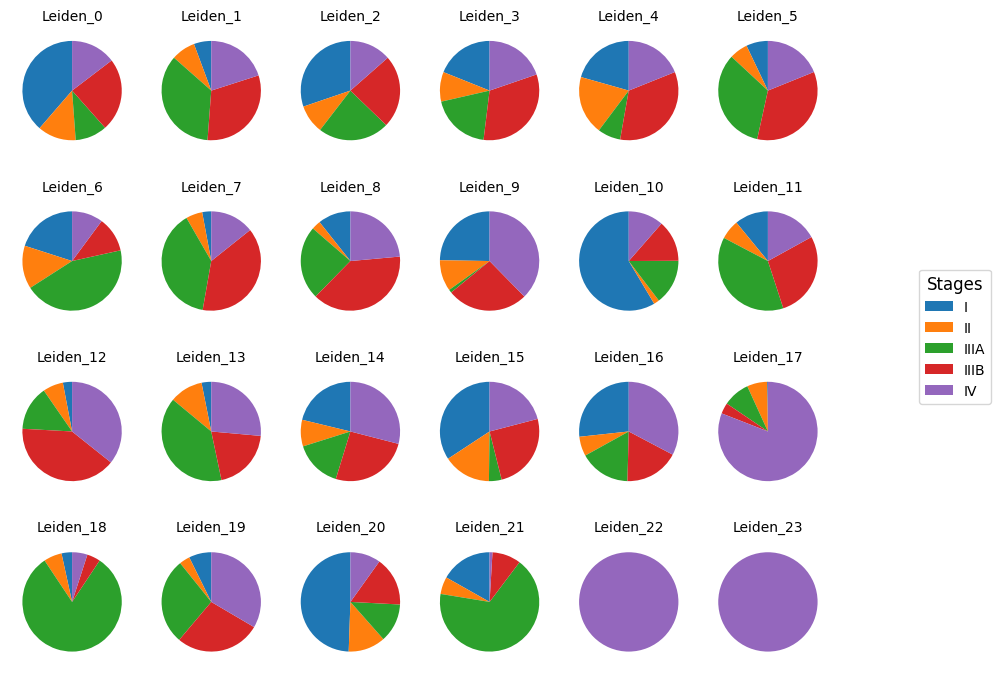

In [51]:
num_clusters = 24
# Subplots of 4 rows and 6 cols
fig, axes = plt.subplots(4, 6, figsize=(10, 7), squeeze=False)

for i, (leiden, row) in enumerate(composition_df.iterrows()):
    # move to a new line of subplots every 6 plots
    ax = axes[i//6, i%6]
    ax.pie(
        row,
        # labels=row.index,
        # autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8}
    )
    ax.set_title(leiden, fontsize=10)

# Adding a legend on the right side of the plot
fig.legend(
    labels=composition_df.columns,
    loc='center right',
    fontsize=10,
    title="Stages",
    title_fontsize=12
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legend
plt.show()        

In [9]:
# Calculating the composition of 'Stage' percentages in each 'celltype' groups
percentage_label_stage = adata.obs.groupby('celltype')['stage'].value_counts(normalize=True)
percentage_label_stage

celltype     stage
B            I        0.335414
             IIIA     0.242334
             IV       0.185889
             IIIB     0.178833
             II       0.057531
Endothelial  IIIA     0.451153
             I        0.188804
             II       0.139133
             IIIB     0.117728
             IV       0.103183
Fibroblast   IIIA     0.376876
             IIIB     0.277140
             IV       0.165049
             I        0.111209
             II       0.069726
Hepatocyte   I        0.314166
             IIIB     0.257482
             IV       0.209604
             II       0.133770
             IIIA     0.084977
Myeloid      IIIB     0.263561
             I        0.255847
             IIIA     0.230827
             IV       0.157020
             II       0.092745
T/NK         IIIB     0.335235
             IIIA     0.310422
             IV       0.203079
             I        0.082451
             II       0.068813
Name: proportion, dtype: float64

In [10]:
composition_label_stage_df = percentage_label_stage.mul(100).unstack(fill_value=0)
composition_label_stage_df

stage,I,II,IIIA,IIIB,IV
celltype,,,,,
B,33.541384,5.753053,24.233379,17.883311,18.588874
Endothelial,18.880351,13.913282,45.115258,11.772777,10.318332
Fibroblast,11.120918,6.972639,37.687555,27.714034,16.504854
Hepatocyte,31.416611,13.376961,8.497738,25.748244,20.960447
Myeloid,25.584749,9.274472,23.082711,26.356054,15.702013
T/NK,8.245086,6.881325,31.042163,33.523504,20.307921


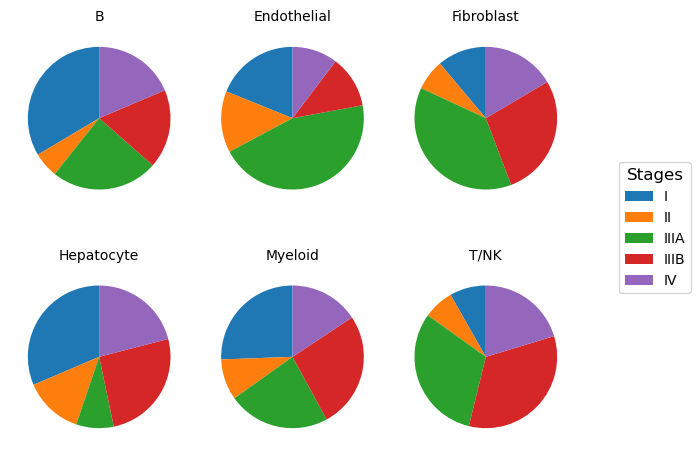

In [13]:
num_clusters = 6
# Subplots of 2 rows and 3 cols
fig, axes = plt.subplots(2, 3, figsize=(7, 5), squeeze=False)

for i, (leiden, row) in enumerate(composition_label_stage_df.iterrows()):
    # move to a new line of subplots every 6 plots
    ax = axes[i//3, i%3]
    ax.pie(
        row,
        # labels=row.index,
        # autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8}
    )
    ax.set_title(leiden, fontsize=10)

# Adding a legend on the right side of the plot
fig.legend(
    labels=composition_label_stage_df.columns,
    loc='center right',
    fontsize=10,
    title="Stages",
    title_fontsize=12
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legend
plt.show()        

## Composition of cell types

In [29]:
### List the cell type composition for every Leiden cluster
percentage_ct = adata.obs.groupby('leiden')['celltype'].value_counts(normalize=True)
composition_df_ct = percentage_ct.mul(100).unstack(fill_value=0)
composition_df_ct

C:\Users\evanlee\AppData\Local\Temp\ipykernel_31428\2694455295.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_ct = adata.obs.groupby('leiden')['celltype'].value_counts(normalize=True)


celltype,B,Endothelial,Fibroblast,Hepatocyte,Myeloid,T/NK
leiden,,,,,,
Leiden_0,0.510291,0.144582,0.153087,95.620003,0.399728,3.172308
Leiden_1,0.078524,0.019631,0.000000,0.274833,0.176678,99.450334
Leiden_2,0.051324,0.041059,0.010265,0.862246,97.731472,1.303634
Leiden_3,0.176678,0.017668,0.017668,0.353357,98.074205,1.360424
Leiden_4,0.059749,0.338578,0.059749,97.072296,0.099582,2.370046
Leiden_5,0.168776,0.000000,0.042194,0.738397,0.443038,98.607595
Leiden_6,0.025920,91.161223,3.421462,1.244168,0.129601,4.017626
Leiden_7,0.235911,0.000000,0.026212,0.602883,0.262123,98.872870
Leiden_8,0.205479,0.068493,0.000000,0.376712,0.273973,99.075342


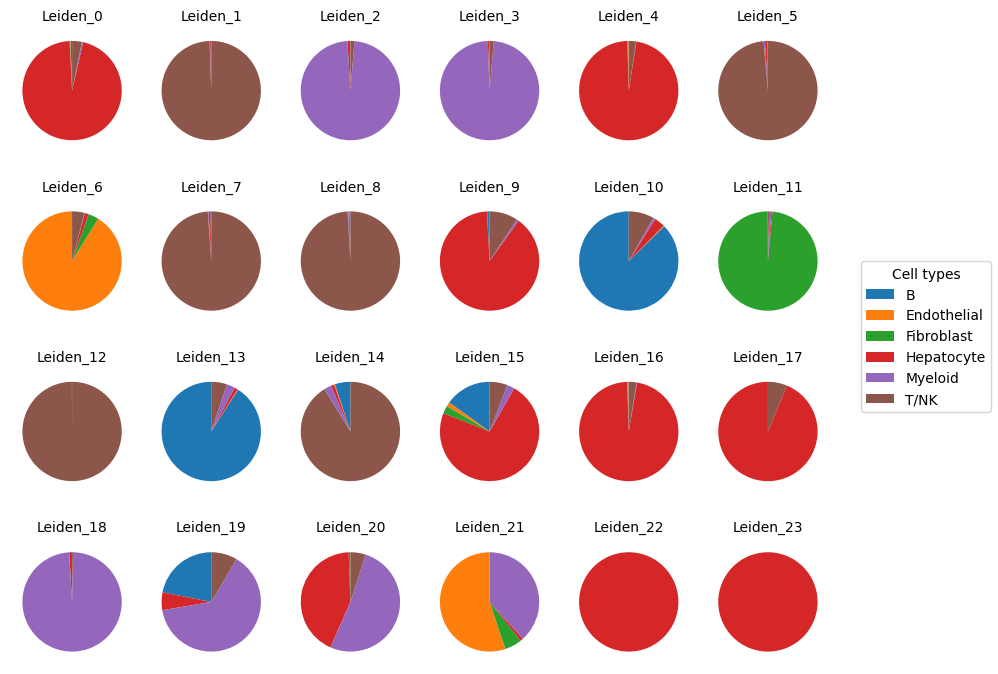

In [52]:
num_clusters = 24
# Subplots of 4 rows and 6 cols
fig, axes = plt.subplots(4, 6, figsize=(10, 7), squeeze=False)

for i, (leiden, row) in enumerate(composition_df_ct.iterrows()):
    # move to a new line of subplots every 6 plots
    ax = axes[i//6, i%6]
    ax.pie(
        row,
        # labels=row.index,
        # autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8}
    )
    ax.set_title(leiden, fontsize=10)

# Adding a legend on the right side of the plot
fig.legend(
    labels=composition_df_ct.columns,
    loc='center right',
    fontsize=10,
    title="Cell types",
    title_fontsize=10
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legend
plt.show()    